In [1]:
import random
import numpy as np
import seaborn as sns
import math
import os
import time
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import multivariate_normal
from scipy.stats import norm, entropy
from sklearn.cluster import KMeans
%matplotlib inline

0 -68.04851587 -- 0.646292815719645
1 -64.65990114 -- 1.0
2 -74.24018359 -- 0.0
3 -71.02574337 -- 0.3355266649784423
4 -71.1803093 -- 0.3193929099658222
5 -70.67351713 -- 0.37229241190065415
6 -72.89913813 -- 0.13997974141148667
7 -70.65461458 -- 0.3742654800328983
8 -71.49046832 -- 0.2870181838949849
9 -72.63432175 -- 0.1676215548321337
10 -70.89410727 -- 0.34926698011915036
11 -67.32704612 -- 0.7216005901788414
12 -68.9454275 -- 0.5526722325394496
13 -71.62344438 -- 0.273138002314327
14 -67.10248095 -- 0.7450409397898285
15 -72.81584615 -- 0.14867384624970034
16 -71.9437302 -- 0.23970623016443496
17 -71.21912385 -- 0.3153414062442385
18 -71.97595916 -- 0.23634213728218412
19 -72.13806524 -- 0.21942133344930745


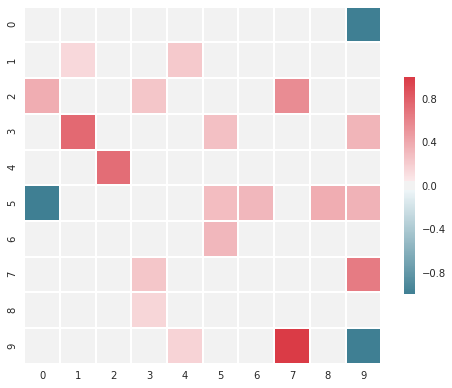

In [2]:
grid_len = 10
intruders = [(0, 9), (9, 9), (5, 0)]
sensor_output = [-68.04851587, -64.65990114, -74.24018359, -71.02574337, -71.1803093,
 -70.67351713, -72.89913813, -70.65461458, -71.49046832, -72.63432175,
 -70.89410727, -67.32704612, -68.9454275 , -71.62344438, -67.10248095,
 -72.81584615, -71.9437302 , -71.21912385, -71.97595916, -72.13806524]
sensors = [(7, 9),(9, 7),(0, 1),(3, 9),(5, 6),(5, 8),(1, 1),(2, 0),(5, 5),(9, 4),(5, 9),(4, 2),(2, 7),(3, 5),(3, 1),(8, 3),(7, 3),(6, 5),(2, 3),(1, 4)]

grid = np.zeros((grid_len, grid_len))
maximum = np.max(sensor_output)
minimum = np.min(sensor_output)
for index, sensor in enumerate(sensors):
    color = (sensor_output[index] - minimum) / (maximum - minimum)
    grid[sensor[0]][sensor[1]] = color
    print(index, sensor_output[index], '--', color)
for intr in intruders:
    grid[intr[0]][intr[1]] = -1
    
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(grid, cmap=cmap, center=0,
            square=True, linewidth=1, cbar_kws={"shrink": .5})

plt.show()

(7, 9) -69.68701811 -- 0
(9, 7) -70.04069849 -- 0
(0, 1) -71.9299942 -- 0
(3, 9) -73.5833492 -- 0
(5, 6) -63.09238231 -- 0.7325809042879856
(5, 8) -68.4299345 -- 0
(1, 1) -70.28922635 -- 0
(2, 0) -67.5562826 -- 0
(5, 5) -65.48050676 -- 0
(9, 4) -69.924485 -- 0
(5, 9) -69.68084369 -- 0
(4, 2) -61.26483488 -- 0.8601979640820405
(2, 7) -73.35248314 -- 0
(3, 5) -70.34719057 -- 0
(3, 1) -59.2627918 -- 1.0
(8, 3) -68.10065083 -- 0
(7, 3) -67.51979584 -- 0
(6, 5) -62.340319 -- 0.7850972476811553
(2, 3) -69.39132478 -- 0
(1, 4) -72.45761138 -- 0


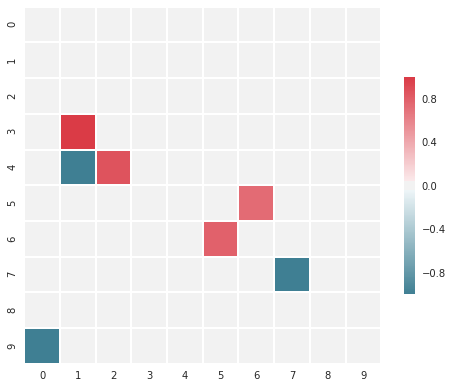

In [12]:
grid_len = 10
intruders = [(9, 0), (7, 7), (4, 1)]
sensor_output = [-69.68701811, -70.04069849, -71.9299942 , -73.5833492 , -63.09238231,
 -68.4299345 ,   -70.28922635, -67.5562826 , -65.48050676, -69.924485,
 -69.68084369,   -61.26483488, -73.35248314, -70.34719057, -59.2627918,
 -68.10065083,   -67.51979584, -62.340319  , -69.39132478, -72.45761138,]
sensors = [(7, 9),(9, 7),(0, 1),(3, 9),(5, 6),(5, 8),(1, 1),(2, 0),(5, 5),(9, 4),(5, 9),(4, 2),(2, 7),(3, 5),(3, 1),(8, 3),(7, 3),(6, 5),(2, 3),(1, 4)]

grid = np.zeros((grid_len, grid_len))
maximum = np.max(sensor_output)
minimum = np.min(sensor_output)
threshold = -65
sensor_to_cluster = []
for index, sensor in enumerate(sensors):
    if sensor_output[index] > threshold:
        color = (sensor_output[index] - minimum) / (maximum - minimum)
        sensor_to_cluster.append(sensor)
    else:
        color = 0
    grid[sensor[0]][sensor[1]] = color
    print((sensor[0], sensor[1]), sensor_output[index], '--', color)
for intr in intruders:
    grid[intr[0]][intr[1]] = -1
    
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(grid, cmap=cmap, center=0,
            square=True, linewidth=1, cbar_kws={"shrink": .5})

plt.show()

In [13]:
kmeans = KMeans(n_clusters=2).fit(sensor_to_cluster)
localize = kmeans.cluster_centers_

In [14]:
for i in range(len(localize)):
    print(localize[i], end=' ')
    localize[i][0] = round(localize[i][0])
    localize[i][1] = round(localize[i][1])
    print(localize[i])

[3.5 1.5] [4. 2.]
[5.5 5.5] [6. 6.]


In [16]:
kmeans.inertia_

2.0

In [29]:
for k in range(2, 3):
    kmeans = KMeans(n_clusters=k).fit(sensor_to_cluster)
    localize = kmeans.cluster_centers_
    for i in range(len(localize)):
        localize[i][0] = round(localize[i][0])
        localize[i][1] = round(localize[i][1])
    print(k, kmeans.inertia_, localize, end='\n\n')

2 2.0 [[4. 2.]
 [6. 6.]]



In [30]:
kmeans.labels_

array([1, 0, 0, 1], dtype=int32)

In [1]:
k = [0.015508741339256931, 0.019535317031721088, 0.022103046446463537, 0.023270535303999338, 0.011639204230541008, 0.017340198666380074, 0.012794230422625527, 0.018555912502468987, 0.02076120980610617, 0.011071688788925144, 0.010334526526941962, 0.022899387670856784, 0.022468408805635887,0.021742502130950185, 0.014215929482065614]

In [2]:
sum(k)/15

0.01761605594366255